# Análisis de la Base de Datos de Prospectos de Oceanica 

El objetivo de este análisis es proporcionar una visión comprensible sobre la base de datos de prospectos del centro de rehabilitación, identificar patrones y tendencias, y ofrecer sugerencias útiles para mejorar la gestión y la toma de decisiones. 

---

## 1. Importación y Preprocesamiento de los Datos

- Visualizar las primeras filas del conjunto de datos


In [20]:

# Importar librerias con las que se van a trabajar 
import pandas as pd
import numpy as np
import warnings
import sys
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
sys.path.append('../Funciones')  # Acceder a la carpeta Funciones

from funciones import analisis_base_dato_1
from funciones import columnas_vacias 
from funciones import analizar_porcentaje_datos_columans

# Importar base de datos 
#prospectos_ppf = pd.read_csv("Prospectos PPF.csv", encoding='ISO-8859-1')
#prospectos_ppi = pd.read_csv("Prospectos PPI.csv", encoding='ISO-8859-1')
#ventas_enero= pd.read_csv("Ventas Enero 2025.csv", encoding='ISO-8859-1')
base_datos = pd.read_csv("C:/Users/julio_2h7cnt5/OneDrive/Documentos/Ideas Frescas/Oceanica/Base_de_datos_clientes.csv",encoding='ISO-8859-1')
base_datos.head()


#                                      TK Empresa  \
0  1  P-E275E6B8-15EE-4EF7-809B-F8A69028A43F       -   
1  2  P-95D89EA1-5D04-4E66-83DB-9C3CE2DFC3E3       -   
2  3  P-1FFB8953-AAE2-4928-8022-7D862CE54E86       -   
3  4  P-8A45F248-76EE-44BF-83F8-83E60D68010F       -   
4  5  P-4BD55533-4CE7-44B6-BFA8-35E08CE9FBD8       -   

                      Correo            Móvil Teléfono Teléfono alternativo  \
0                          -   \t+15756216679        -                    -   
1   carlos.mezam@hotmail.com  \t+526311253699        -                    -   
2  edith.figueroa@icloud.com  \t+525527292777        -                    -   
3                          -  \t+529612626386        -    \t+52961 111 6109   
4     franrincon12@gmail.com  \t+526671610448        -                    -   

  Puesto           Fase Objetivo  ... Título  \
0      -  Cliente nuevo        -  ...      -   
1      -  Cliente nuevo        -  ...      -   
2      -  Cliente nuevo        -  ...      -   
3      -  Cliente nuevo        -  ...      -   
4      -  Cliente nuevo        -  ...      -   

                             estatus egreso  \
0                                         -   
1                                         -   
2                                         -   
3  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE   
4                                         -   

                          Estatus Egreso New  Fecha de nacimiento  \
0  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE                     -   
1                                                               -   
2                                                               -   
3  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE                     -   
4                                                               -   

   Fecha de Egreso  estatus clínico  Estatus Clínico New código px  \
0        30-Nov-24                -          ABSTINENTE       8663   
1                -                -                              -   
2                -                -                              -   
3      13/Dic/2024       ABSTINENTE          ABSTINENTE       8669   
4                -                -                              -   

  clave personal                   Contacto por  
0          32199  Llamada por callweb, Whatsapp  
1          32208                              -  
2          32225                              -  
3          32206  Llamada por callweb, Whatsapp  
4          32645                              -  

[5 rows x 56 columns]

###  Limpieza de la base de datos:
- Manejo de valores nulos (eliminación o imputación, dependiendo del contexto).
- Corrección de datos inconsistentes o erróneos.
- Eliminación de duplicados

In [21]:

# Remplazar valores no validos por nulos 
base_datos = base_datos.replace('-',np.nan)
base_datos = base_datos.replace(' ',np.nan)

import re
# Limpiar y formatear directamente la columna 'Móvil'
base_datos['Móvil'] = base_datos['Móvil'].apply(lambda telefono: 
    # Limpiar el teléfono
    # Verificar si el valor es "Nah" y asegurarse de que sea una cadena
    None if isinstance(telefono, str) and telefono.strip().lower() == "nah" else 
    re.sub(r'\D', '', telefono.strip())  # Eliminar caracteres no numéricos
)

# Formatear los números según la longitud
base_datos['Móvil'] = base_datos['Móvil'].apply(lambda telefono_limpio: 
    # Verificar si empieza con el código de país '52' (México) y tiene 12 dígitos (incluyendo el código de país)
    f"+{telefono_limpio[:2]} ({telefono_limpio[2:5]}) {telefono_limpio[5:8]}-{telefono_limpio[8:]}" 
    if len(telefono_limpio) == 12 and telefono_limpio.startswith('52') else
    # Verificar si tiene 11 dígitos para formato internacional
    f"+{telefono_limpio[:1]} ({telefono_limpio[1:4]}) {telefono_limpio[4:7]}-{telefono_limpio[7:]}" 
    if len(telefono_limpio) == 11 else
    # Verificar si tiene 10 dígitos para formato local
    f"({telefono_limpio[:3]}) {telefono_limpio[3:6]}-{telefono_limpio[6:]}" 
    if len(telefono_limpio) == 10 else
    # Si no es válido
    None
)

# Limpiar y formatear directamente la columna 'Teléfono '
base_datos['Teléfono'] = base_datos['Teléfono'].apply(lambda telefono: 
    # Verificar si el valor es "Nah" y asegurarse de que sea una cadena
    None if isinstance(telefono, str) and telefono.strip().lower() == "nah" else 
    # Limpiar el teléfono solo si es una cadena
    re.sub(r'\D', '', str(telefono).strip())  # Eliminar caracteres no numéricos
)

# Formatear los números según la longitud
base_datos['Teléfono'] = base_datos['Teléfono'].apply(lambda telefono_limpio: 
    # Verificar si empieza con el código de país '52' (México) y tiene 12 dígitos (incluyendo el código de país)
    f"+{telefono_limpio[:2]} ({telefono_limpio[2:5]}) {telefono_limpio[5:8]}-{telefono_limpio[8:]}" 
    if len(telefono_limpio) == 12 and telefono_limpio.startswith('52') else
    # Verificar si tiene 11 dígitos para formato internacional
    f"+{telefono_limpio[:1]} ({telefono_limpio[1:4]}) {telefono_limpio[4:7]}-{telefono_limpio[7:]}" 
    if len(telefono_limpio) == 11 else
    # Verificar si tiene 10 dígitos para formato local
    f"({telefono_limpio[:3]}) {telefono_limpio[3:6]}-{telefono_limpio[6:]}" 
    if len(telefono_limpio) == 10 else
    # Si no es válido
    None
)


# Limpiar y formatear directamente la columna 'Teléfono alternativo'
base_datos['Teléfono alternativo'] = base_datos['Teléfono alternativo'].apply(lambda telefono: 
    # Verificar si el valor es "Nah" y asegurarse de que sea una cadena
    None if isinstance(telefono, str) and telefono.strip().lower() == "nah" else 
    # Limpiar el teléfono solo si es una cadena
    re.sub(r'\D', '', str(telefono).strip())  # Eliminar caracteres no numéricos
)

# Formatear los números según la longitud
base_datos['Teléfono alternativo'] = base_datos['Teléfono alternativo'].apply(lambda telefono_limpio: 
    # Verificar si empieza con el código de país '52' (México) y tiene 12 dígitos (incluyendo el código de país)
    f"+{telefono_limpio[:2]} ({telefono_limpio[2:5]}) {telefono_limpio[5:8]}-{telefono_limpio[8:]}" 
    if len(telefono_limpio) == 12 and telefono_limpio.startswith('52') else
    # Verificar si tiene 11 dígitos para formato internacional
    f"+{telefono_limpio[:1]} ({telefono_limpio[1:4]}) {telefono_limpio[4:7]}-{telefono_limpio[7:]}" 
    if len(telefono_limpio) == 11 else
    # Verificar si tiene 10 dígitos para formato local
    f"({telefono_limpio[:3]}) {telefono_limpio[3:6]}-{telefono_limpio[6:]}" 
    if len(telefono_limpio) == 10 else
    # Si no es válido
    None
)

base_datos.head()

#                                      TK  Empresa  \
0  1  P-E275E6B8-15EE-4EF7-809B-F8A69028A43F      NaN   
1  2  P-95D89EA1-5D04-4E66-83DB-9C3CE2DFC3E3      NaN   
2  3  P-1FFB8953-AAE2-4928-8022-7D862CE54E86      NaN   
3  4  P-8A45F248-76EE-44BF-83F8-83E60D68010F      NaN   
4  5  P-4BD55533-4CE7-44B6-BFA8-35E08CE9FBD8      NaN   

                      Correo               Móvil Teléfono  \
0                        NaN   +1 (575) 621-6679     None   
1   carlos.mezam@hotmail.com  +52 (631) 125-3699     None   
2  edith.figueroa@icloud.com  +52 (552) 729-2777     None   
3                        NaN  +52 (961) 262-6386     None   
4     franrincon12@gmail.com  +52 (667) 161-0448     None   

  Teléfono alternativo  Puesto           Fase  Objetivo  ... Título  \
0                 None     NaN  Cliente nuevo       NaN  ...    NaN   
1                 None     NaN  Cliente nuevo       NaN  ...    NaN   
2                 None     NaN  Cliente nuevo       NaN  ...    NaN   
3   +52 (961) 111-6109     NaN  Cliente nuevo       NaN  ...    NaN   
4                 None     NaN  Cliente nuevo       NaN  ...    NaN   

                             estatus egreso  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE   
4                                       NaN   

                          Estatus Egreso New  Fecha de nacimiento  \
0  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE                   NaN   
1                                        NaN                  NaN   
2                                        NaN                  NaN   
3  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE                   NaN   
4                                        NaN                  NaN   

   Fecha de Egreso  estatus clínico  Estatus Clínico New código px  \
0        30-Nov-24              NaN          ABSTINENTE       8663   
1              NaN              NaN                  NaN       NaN   
2              NaN              NaN                  NaN       NaN   
3      13/Dic/2024       ABSTINENTE          ABSTINENTE       8669   
4              NaN              NaN                  NaN       NaN   

  clave personal                   Contacto por  
0          32199  Llamada por callweb, Whatsapp  
1          32208                            NaN  
2          32225                            NaN  
3          32206  Llamada por callweb, Whatsapp  
4          32645                            NaN  

[5 rows x 56 columns]

In [38]:
# Calcular el porcentaje de datos completos en el DataFrame
total= base_datos.size  # Total de valores en el DataFrame
valores = base_datos.notna().sum().sum()  # Sumar valores no nulos en todo el DataFrame

# Porcentaje de datos completos
porcentaje = (valores / total) * 100

# Porcentaje de datos faltantes (nulos)
porcentaje_f = 100 - porcentaje

porcentaje, porcentaje_f

(np.float64(54.62827988338192), np.float64(45.37172011661808))


---

### Datos Cliente

In [23]:

lista_columnas_cliente = list(base_datos.columns)
# Obtener elementos del índice 3 al 6 
rango_cliente = lista_columnas_cliente[3:7]

# Obtener el índice 20 (único valor)
valor1_cliente = [lista_columnas_cliente[20]]

# Obtener los valores del índice 25 al 32 
valor2_cliente = lista_columnas_cliente[25:32]

# Obtener el índice 49
valor3_cliente = [lista_columnas_cliente[49]]


resultado_cliente = rango_cliente + valor1_cliente + valor2_cliente + valor3_cliente
datos_contacto = base_datos[resultado_cliente]
datos_contacto.head()

Correo               Móvil Teléfono  \
0                        NaN   +1 (575) 621-6679     None   
1   carlos.mezam@hotmail.com  +52 (631) 125-3699     None   
2  edith.figueroa@icloud.com  +52 (552) 729-2777     None   
3                        NaN  +52 (961) 262-6386     None   
4     franrincon12@gmail.com  +52 (667) 161-0448     None   

  Teléfono alternativo  Género                       Calle     Colonia  \
0                 None  Hombre            3424 winterhaven         NaN   
1                 None  Hombre                 navojoa #10     kennedy   
2                 None   Mujer  FRACC. PRIVADA DEL PARAISO  BUGAMBILIA   
3   +52 (961) 111-6109  Hombre                   5 de mayo     Paredón   
4                 None  Hombre     bahia de navachiste #15      Scally   

       Ciudad        Estado/Región            País  Municipio  Código postal  \
0         NaN           New Mexico  Estados Unidos        NaN            NaN   
1         NaN               Sonora          México        NaN            NaN   
2         NaN  Baja California Sur          México        NaN            NaN   
3         NaN              Chiapas          México        NaN            NaN   
4  los mochis              Sinaloa          México        NaN            NaN   

   Fecha de nacimiento  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [24]:
resultado_cliente

['Correo',
 'Móvil',
 'Teléfono',
 'Teléfono alternativo',
 'Género',
 'Calle',
 'Colonia',
 'Ciudad',
 'Estado/Región',
 'País',
 'Municipio',
 'Código postal',
 'Fecha de nacimiento']

In [25]:


# Calcular el porcentaje de datos completos en el DataFrame
total_valores_contacto = datos_contacto.size  # Total de valores en el DataFrame
valores_no_nulos_contacto = datos_contacto.notna().sum().sum()  # Sumar valores no nulos en todo el DataFrame

# Porcentaje de datos completos
porcentaje_completo_contacto = (valores_no_nulos_contacto / total_valores_contacto) * 100

# Porcentaje de datos faltantes (nulos)
porcentaje_faltante_contacto = 100 - porcentaje_completo_contacto

porcentaje_completo_contacto, porcentaje_faltante_contacto

(np.float64(40.031397174254316), np.float64(59.968602825745684))

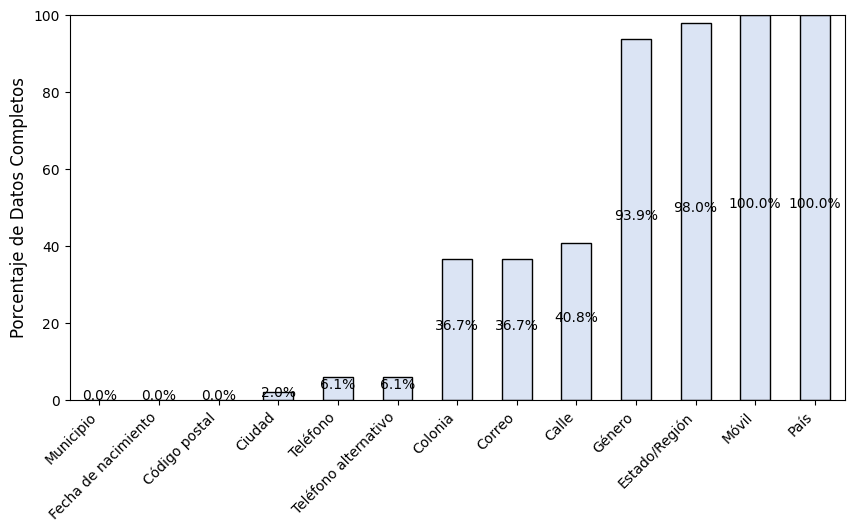

In [26]:

df = datos_contacto

# Calcular el % de datos completos por columna
completitud = df.notna().sum() / len(df) * 100

# Crear la gráfica de barras
plt.figure(figsize=(10, 5))
completitud.sort_values().plot(kind='bar', color='#DBE4F4', edgecolor='black')

# Personalización de la gráfica

plt.ylabel('Porcentaje de Datos Completos', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)


# Mostrar los valores en las barras
for index, value in enumerate(completitud.sort_values()):
    plt.text(index, value / 2, f"{value:.1f}%", ha='center', fontsize=10)

plt.show()



---

### Historial Comercial del cliente

In [27]:
lista_columnas_hcc = list(base_datos.columns)


rango1_hcc = [lista_columnas_hcc[8]]


rango2_hcc = lista_columnas_hcc[11:20]

resultado_hcc = rango1_hcc + rango2_hcc 


base_hcc = base_datos[resultado_hcc]
base_hcc.head()

Fase  Compras acumuladas  Anticipo  Saldo  Saldo vencido  \
0  Cliente nuevo                 0.0       0.0      0              0   
1  Cliente nuevo                 0.0       0.0      0              0   
2  Cliente nuevo                 0.0       0.0      0              0   
3  Cliente nuevo                 0.0       0.0      0              0   
4  Cliente nuevo                 0.0       0.0      0              0   

   Monto promedio  # Transacciones Primer compra Última compra  \
0             0.0                0           NaN           NaN   
1             0.0                0           NaN           NaN   
2             0.0                0           NaN           NaN   
3             0.0                0           NaN           NaN   
4             0.0                0           NaN           NaN   

   Días sin comprar  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [28]:
resultado_hcc

['Fase',
 'Compras acumuladas',
 'Anticipo',
 'Saldo',
 'Saldo vencido',
 'Monto promedio',
 '# Transacciones',
 'Primer compra',
 'Última compra',
 'Días sin comprar']

In [29]:

# Calcular el porcentaje de datos completos en el DataFrame
total_valores_hcc = base_hcc.size  # Total de valores en el DataFrame
valores_no_nulos_hcc = base_hcc.notna().sum().sum()  # Sumar valores no nulos en todo el DataFrame

# Porcentaje de datos completos
porcentaje_completo_hcc = (valores_no_nulos_hcc / total_valores_hcc) * 100

# Porcentaje de datos faltantes (nulos)
porcentaje_faltante_hcc = 100 - porcentaje_completo_hcc

porcentaje_completo_hcc, porcentaje_faltante_hcc

(np.float64(93.87755102040816), np.float64(6.122448979591837))

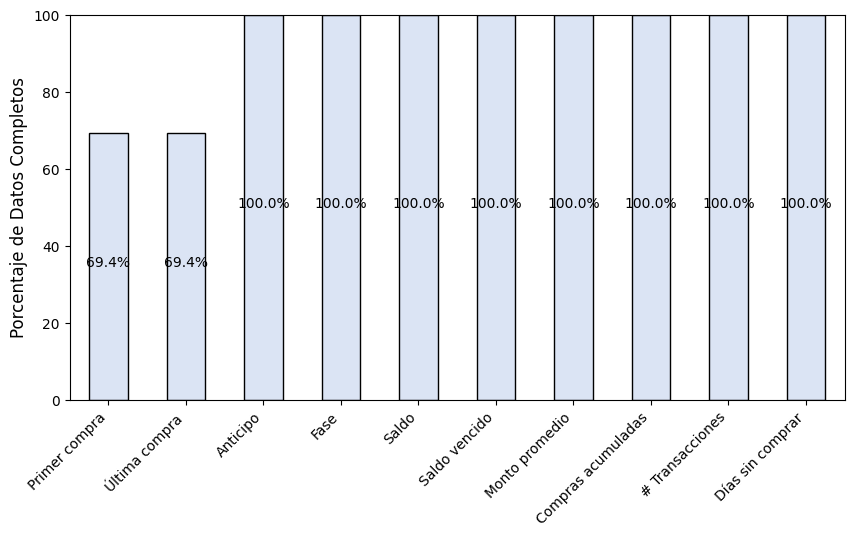

In [30]:

df = base_hcc

# Calcular el % de datos completos por columna
completitud = df.notna().sum() / len(df) * 100

# Crear la gráfica de barras
plt.figure(figsize=(10, 5))
completitud.sort_values().plot(kind='bar', color='#DBE4F4', edgecolor='black')

# Personalización de la gráfica

plt.ylabel('Porcentaje de Datos Completos', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)


# Mostrar los valores en las barras
for index, value in enumerate(completitud.sort_values()):
    plt.text(index, value / 2, f"{value:.1f}%", ha='center', fontsize=10)

plt.show()



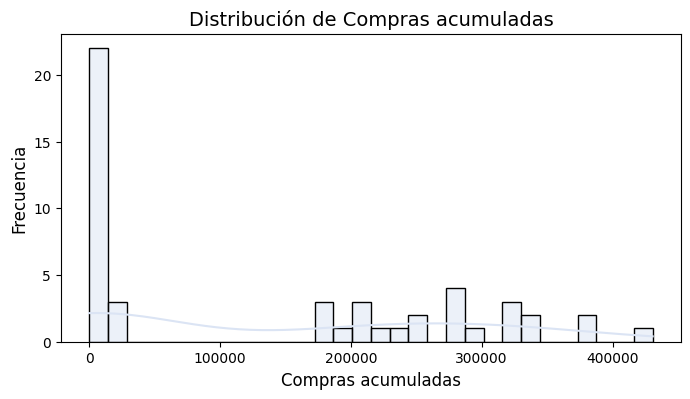

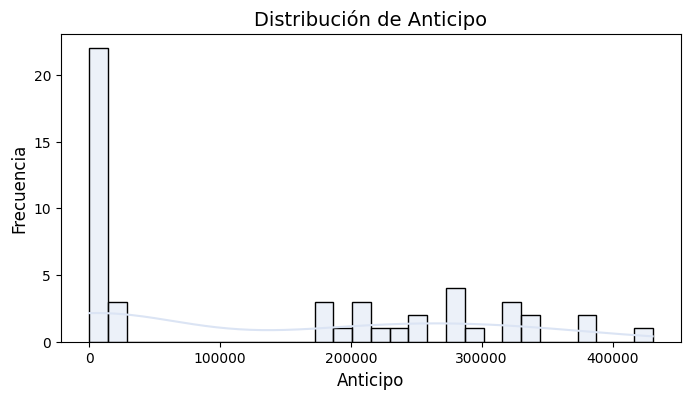

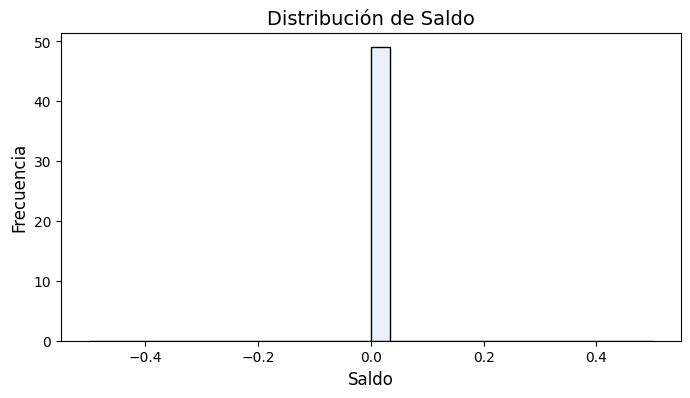

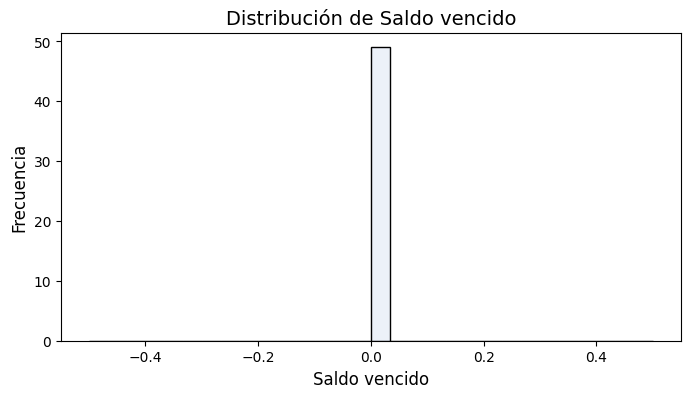

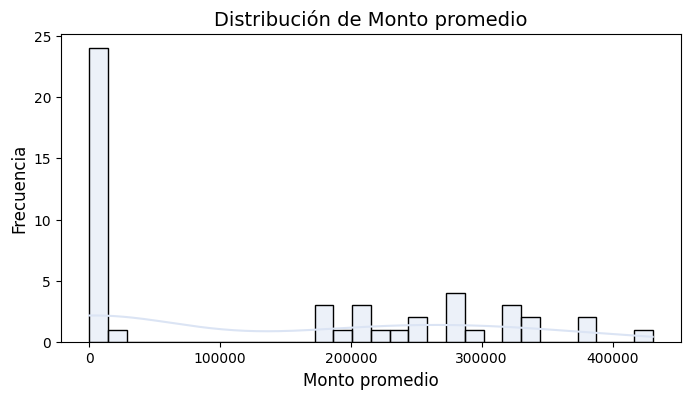

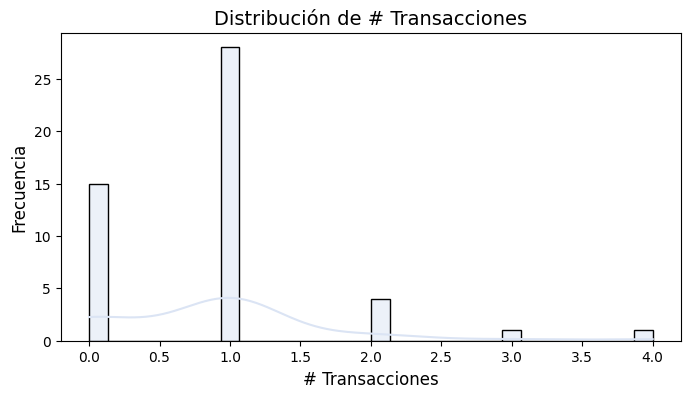

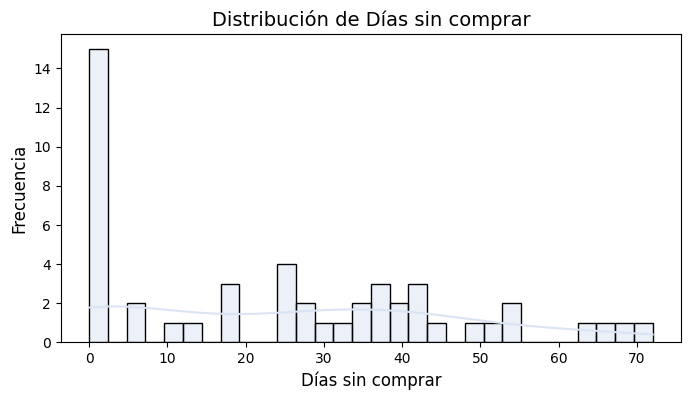

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualización de la distribución de los datos (para variables numéricas)
for col in base_hcc.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(base_hcc[col], kde=True, bins=30, color='#DBE4F4')
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.show()


In [33]:
base_faltante.columns

Index(['#', 'TK', 'Empresa', 'Puesto', 'Objetivo', 'Origen',
       'Fecha de último contacto', 'Último contacto', 'Corporativo',
       'Industria', 'Próximo seguimiento', 'Fecha de creación',
       'Última modificación del contacto', 'Ejecutivo', 'Iniciales ',
       'Correo del ejecutivo', 'Situación', 'Situación.1', 'Situación.2',
       'Primer interacción', 'Descartado el', 'Descartado por', '# Empleados',
       'Etiquetas', 'Título', 'estatus egreso', 'Estatus Egreso New',
       'Fecha de Egreso', 'estatus clínico', 'Estatus Clínico New',
       'código px', 'clave personal', 'Contacto por'],
      dtype='object')


---

### Seguimiento al Cliente

In [34]:
lista_ya_usada = resultado_cliente + resultado_hcc
datos_seg=base_datos.drop(columns=lista_ya_usada)
datos_seg.head()

#                                      TK  Empresa  Puesto  Objetivo  \
0  1  P-E275E6B8-15EE-4EF7-809B-F8A69028A43F      NaN     NaN       NaN   
1  2  P-95D89EA1-5D04-4E66-83DB-9C3CE2DFC3E3      NaN     NaN       NaN   
2  3  P-1FFB8953-AAE2-4928-8022-7D862CE54E86      NaN     NaN       NaN   
3  4  P-8A45F248-76EE-44BF-83F8-83E60D68010F      NaN     NaN       NaN   
4  5  P-4BD55533-4CE7-44B6-BFA8-35E08CE9FBD8      NaN     NaN       NaN   

           Origen Fecha de último contacto  \
0  Postratamiento                17-Feb-25   
1  Postratamiento                13-Feb-25   
2  Postratamiento                13-Feb-25   
3  Postratamiento                13-Feb-25   
4  Postratamiento                12-Feb-25   

                                     Último contacto  Corporativo  Industria  \
0  Faltan 51 minutos [CC] - Un nuevo recordatorio...          NaN        NaN   
1  Hace 3 días [CC] - Buenas tardes Carlos, ¿Cómo...          NaN        NaN   
2  Hace 3 días [CC] - alumna reagenda cita con ár...          NaN        NaN   
3  Hace 3 días [CC] - Buen día Adier, ¿Cómo estás...          NaN        NaN   
4  Hace 4 días [CC] - Alumno se comunica vía llam...          NaN        NaN   

   ...                        Etiquetas Título  \
0  ...                 Oceánica-Conecta    NaN   
1  ...                              NaN    NaN   
2  ...  Oceánica-Conecta,postratamiento    NaN   
3  ...  Oceánica-Conecta,postratamiento    NaN   
4  ...     FB V_Pacifica,postratamiento    NaN   

                             estatus egreso  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE   
4                                       NaN   

                          Estatus Egreso New Fecha de Egreso estatus clínico  \
0  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE        30-Nov-24             NaN   
1                                        NaN             NaN             NaN   
2                                        NaN             NaN             NaN   
3  TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE      13/Dic/2024      ABSTINENTE   
4                                        NaN             NaN             NaN   

  Estatus Clínico New código px clave personal                   Contacto por  
0         ABSTINENTE       8663          32199  Llamada por callweb, Whatsapp  
1                 NaN       NaN          32208                            NaN  
2                 NaN       NaN          32225                            NaN  
3         ABSTINENTE       8669          32206  Llamada por callweb, Whatsapp  
4                 NaN       NaN          32645                            NaN  

[5 rows x 33 columns]

In [35]:


# Calcular el porcentaje de datos completos en el DataFrame
total_valores_seg = datos_seg.size  # Total de valores en el DataFrame
valores_no_nulos_seg = datos_seg.notna().sum().sum()  # Sumar valores no nulos en todo el DataFrame

# Porcentaje de datos completos
porcentaje_completo_seg = (valores_no_nulos_seg / total_valores_seg) * 100

# Porcentaje de datos faltantes (nulos)
porcentaje_faltante_seg = 100 - porcentaje_completo_seg

porcentaje_completo_seg, porcentaje_faltante_seg

(np.float64(48.484848484848484), np.float64(51.515151515151516))

In [37]:
datos_seg.columns

Index(['#', 'TK', 'Empresa', 'Puesto', 'Objetivo', 'Origen',
       'Fecha de último contacto', 'Último contacto', 'Corporativo',
       'Industria', 'Próximo seguimiento', 'Fecha de creación',
       'Última modificación del contacto', 'Ejecutivo', 'Iniciales ',
       'Correo del ejecutivo', 'Situación', 'Situación.1', 'Situación.2',
       'Primer interacción', 'Descartado el', 'Descartado por', '# Empleados',
       'Etiquetas', 'Título', 'estatus egreso', 'Estatus Egreso New',
       'Fecha de Egreso', 'estatus clínico', 'Estatus Clínico New',
       'código px', 'clave personal', 'Contacto por'],
      dtype='object')

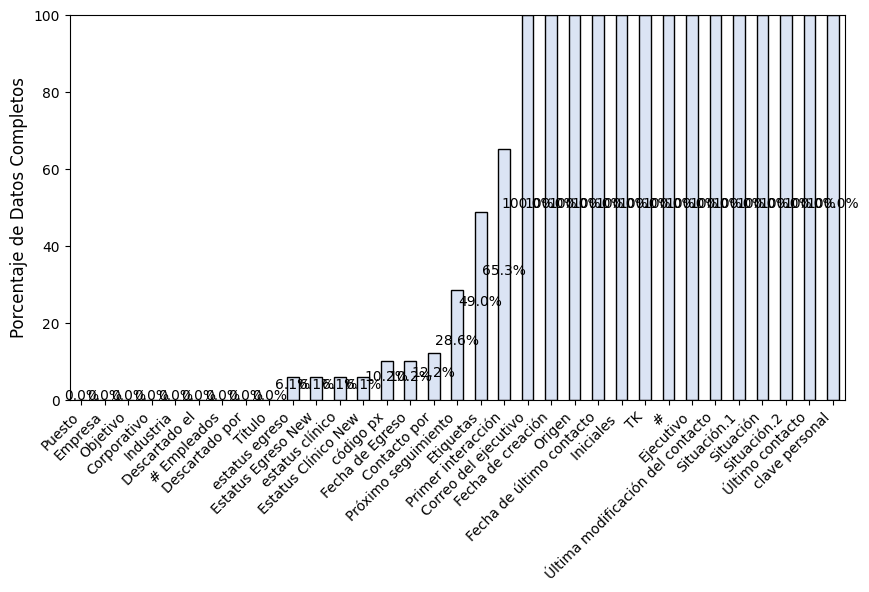

In [36]:
df = datos_seg

# Calcular el % de datos completos por columna
completitud = df.notna().sum() / len(df) * 100

# Crear la gráfica de barras
plt.figure(figsize=(10, 5))
completitud.sort_values().plot(kind='bar', color='#DBE4F4', edgecolor='black')

# Personalización de la gráfica

plt.ylabel('Porcentaje de Datos Completos', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)


# Mostrar los valores en las barras
for index, value in enumerate(completitud.sort_values()):
    plt.text(index, value / 2, f"{value:.1f}%", ha='center', fontsize=10)

plt.show()



**Datos Generales**

- Porcentaje de datos completos: **54.63%**
- Porcentaje de datos faltantes: **45.37%**

**Columnas Incompletas y sin Valor Aportado**

Las siguientes columnas tienen un porcentaje elevado de datos faltantes y no aportan valor significativo a la base de datos:
- Empresa
- Puesto
- Objetivo
- Corporativo
- Industria
- Municipio
- Código postal
- Descartado el
- Descartado por
- '# Empleados
- Título
- Fecha de nacimiento


**Informacion por columna:**

In [ ]:
for key, value in resultado.items():
    print(f"{key}: {value}")

2. Problemas Detectados en la Base de Datos

2.1 Columnas con Alto Porcentaje de Datos Faltantes

Se identificaron varias columnas con un alto porcentaje de valores nulos, lo que sugiere que no están siendo capturadas correctamente o no son relevantes en la operativa del negocio. Entre ellas:

Empresa, Puesto, Objetivo, Corporativo, Industria, Municipio, Código Postal, Descartado el, Descartado por, # Empleados, Título, Fecha de Nacimiento.
Estas variables tienen una cantidad significativa de valores nulos, lo que sugiere que no están bien registradas o que no aportan valor relevante en el proceso de conversión de prospectos.

2.2 Problemas con la Calidad de los Datos

Teléfonos y correos electrónicos: Existen múltiples registros con datos no válidos en los campos de contacto, lo que puede afectar las estrategias de seguimiento.
Formato inconsistente en fechas: Se encontraron diferentes formatos de fechas (dd/mm/yyyy, dd-mmm-yy), lo que dificulta su procesamiento automatizado.
Doble almacenamiento de variables: Algunas columnas parecen duplicadas o tienen versiones alternativas (Estatus Egreso / Estatus Egreso New, estatus clínico / Estatus Clínico New).

2.3 Distribución de Datos por Completitud

Columnas con 100% de datos completos: Información como móvil, teléfono, fase, origen, compras acumuladas y clave personal están bien registradas y pueden ser útiles para análisis.
Columnas con 50%-90% de datos: Algunas variables claves como género y estado/región tienen registros parcialmente completos, lo que permite hacer un análisis segmentado.
Columnas con menos del 20% de datos: Variables como fecha de egreso, código px y contacto por tienen muy poca información registrada, lo que limita su utilidad.

3. Conclusiones Preliminares

- Columnas Poco Útiles para el Análisis:
Se recomienda eliminar o redefinir las columnas con más del 80% de datos faltantes, a menos que sean críticas para el negocio.

- Datos Financieros con Nulos:
Variables como Saldo y Saldo vencido tienen valores faltantes en su totalidad, lo que impide un análisis financiero confiable. Se debe revisar su origen.

- Problemas en la Información de Contacto:
Una gran parte de los registros tiene correos o teléfonos no válidos, lo que puede afectar la comunicación con los prospectos.

- Duplicidad de Campos:
Se identificaron variables similares (Estatus Egreso / Estatus Egreso New). Se recomienda unificar estos campos para evitar redundancias.

    




--- 
## 2. Análisis Descriptivo



In [ ]:
analisis_base_dato_1(base_datos)

Estadísticas descriptivas: Calcular medidas estadísticas básicas para cada columna numérica, como la media, mediana, desviación estándar, etc.   

In [ ]:

import numpy as np    
# Inicializa DataFrame para la matriz de correlación (solo para variables numéricas)
correlation_matrix = pd.DataFrame()

# Inicializa listas para outliers
outliers = pd.DataFrame(columns=['Outliers'])

# Estadísticas descriptivas
summary_stats = pd.DataFrame()

    # Itera sobre todas las columnas de la base de datos para realizar los análisis
for col in base_datos.columns:
    if base_datos[col].dtype != 'object':
        outliers.loc[col] = ((base_datos[col] - base_datos[col].mean()).abs() > 3 * base_datos[col].std()).sum()


# Filtra las columnas numéricas antes de calcular la matriz de correlación
numeric_data = base_datos.select_dtypes(include=[np.number])
    
# Cálculo de la matriz de correlación solo para columnas numéricas
correlation_matrix = numeric_data.corr()

# Resumen estadístico (media, mediana, desviación estándar, etc.)
summary_stats = base_datos.describe()

# Resumen estadístico (media, mediana, desviación estándar, etc.)
print("Resumen estadístico de la base de datos")
summary_stats 

Distribución de las variables: Crear gráficos de distribución (histogramas, gráficos de caja) para entender cómo se distribuyen las variables clave (por ejemplo, edad, tiempo de rehabilitación, tipo de tratamiento, etc.).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualización de la distribución de los datos (para variables numéricas)
for col in base_datos.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(base_datos[col], kde=True, bins=30, color='#DBE4F4')
    plt.title(f"Distribución de {col}", fontname='Roboto', fontsize=14)
    plt.xlabel(col, fontname='Roboto', fontsize=12)
    plt.ylabel("Frecuencia", fontname='Roboto', fontsize=12)
    plt.show()


Identificación de patrones: 

In [ ]:

# Imprime la matriz de correlación y el resumen estadístico
print("Matriz de correlación:")
correlation_matrix

In [ ]:
# Imprime el análisis de outliers
print("\nAnálisis de Outliers (valores atípicos detectados):")
outliers


---
### 3. **Segmentación de Prospectos**


- **Clasificación por tipo de tratamiento o diagnóstico**: Solamente se tiene información de 3 personas que cumplieron con todo el proceso.


In [ ]:
base_datos[base_datos['estatus egreso']=='TRATAMIENTO CONCLUIDO SATISFACTORIAMENTE']

- **Segmentación por grupo de edad**: No se tiene información detallada del prospecto


- **Segmentación por tiempo estimado de rehabilitación**:Las fechas no cooncuerdan para hacer una estimación.

- **Análisis de la frecuencia de contacto**: No cuentan con con una secuencia de seguimiento para evaluar el desempeño del seguimiento. 


---
### 4. **Análisis de Conversión**

No contamos con la información suficente para llegar a una conclusion sobre el tiempo de verncierion de un lead a un cliete. 




---
### **Conclusiones Finales sobre la Base de Datos de Prospectos**

#### **1. Falta de Información sobre los Prospectos**
- No se cuenta con información detallada sobre los prospectos, solo su país y estado de origen.  
- No hay datos sobre dirección, edad, género u otras características clave que permitan una segmentación efectiva.  

**➡ Impacto:**  
- Sin detalles demográficos o socioeconómicos, es difícil hacer un análisis profundo sobre el perfil de los prospectos.  
- No se pueden identificar patrones en la conversión de clientes.  

#### **2. Inconsistencias en las Fechas de Conversión**
- Se registraron **fechas de egreso previas a la primera interacción**, lo cual es un error lógico en los datos.  
- Solo hay 3 personas registradas como clientes, lo que limita la capacidad de análisis de la tasa de conversión.  

**➡ Impacto:**  
- No se puede calcular la tasa de conversión de prospectos a clientes con datos incorrectos.  
- No se pueden analizar tiempos promedio de conversión o identificar cuellos de botella en el proceso.  

#### **3. Falta de Registro en el Seguimiento de Prospectos**
- No hay un registro estructurado de los tiempos y métodos de seguimiento de los leads.  
- No se sabe cuántos contactos se realizaron antes de que un prospecto decidiera ingresar.  

**➡ Impacto:**  
- No se puede evaluar la efectividad del proceso de captación.  
- Es imposible identificar qué estrategias de contacto funcionan mejor.  

---

#### **Recomendaciones para Mejorar la Base de Datos**

##### **1. Estandarizar y Completar la Información**
✅ Corregir las fechas inconsistentes en los registros de ingreso y egreso.  
✅ Asegurar que todos los prospectos tengan al menos una fecha de interacción inicial válida.  
✅ Capturar información clave de los prospectos desde el inicio (edad, género, tipo de adicción, historial médico relevante).  

##### **2. Registrar el Seguimiento de los Leads**
✅ Implementar un sistema donde se registren **todas las interacciones** con cada prospecto (llamadas, correos, WhatsApp, reuniones).  
✅ Agregar un campo para la **fecha de cada contacto** y el **medio utilizado**.  
✅ Evaluar la efectividad de cada tipo de contacto en la conversión de prospectos.  

##### **3. Mejorar la Trazabilidad del Proceso**
✅ Implementar un flujo de seguimiento que registre las siguientes métricas:  
   - Fecha de primera interacción.  
   - Fecha de cada seguimiento.  
   - Fecha de conversión (si aplica).  
   - Fecha de egreso con validación lógica.  
✅ Agregar campos que permitan calcular métricas como tiempo promedio de conversión y tasa de éxito.  

##### **4. Implementar un Proceso de Validación de Datos**
✅ Evitar errores de captura con reglas en el sistema de registro (ejemplo: no permitir fechas de egreso antes de la fecha de ingreso).  
✅ Implementar una validación automática de formatos para teléfonos y correos electrónicos.  

---

# **Conclusión Final**
🔴 **Actualmente, la base de datos no permite medir correctamente la tasa de conversión ni la efectividad del proceso de captación de prospectos, ni poder clasificar los tipos de prospectos que llegan.**  

🟢 **Con las mejoras recomendadas, se podrá tener una base de datos funcional que permita tomar decisiones basadas en datos reales y corregir ineficiencias en el proceso de conversión de prospectos.**  






# **La Importancia de una Base de Datos Completa: Un Caso para el Análisis de Datos**

Imagina que estás a cargo de un centro de rehabilitación y quieres entender mejor a tus prospectos y clientes. Buscas responder preguntas clave como:  
- **¿De dónde provienen nuestros clientes?**  
- **¿Cuánto tiempo tardan en decidirse por el tratamiento?**  
- **¿Qué características tienen los prospectos que realmente se convierten en clientes?**  
- **¿Podemos predecir la demanda futura para estar mejor preparados?**  

Para responder estas preguntas con ciencia de datos, no basta con tener unos cuantos registros dispersos. **Necesitamos una base de datos estructurada, con información suficiente y de calidad.**  



## **¿Cuántos datos son necesarios para hacer análisis efectivos?**  

Para realizar análisis estadísticos, correlaciones y predicciones confiables, debemos contar con:  

### **1. Suficiente Volumen de Datos**  

### **2. Datos Claves para el Análisis**  

### **3. Coherencia y Calidad en los Datos**  


## **¿Qué se puede lograr con una base de datos bien estructurada?**  
Si logramos registrar y limpiar los datos correctamente, podemos hacer análisis como:  
📊 **Identificar los canales más efectivos** para captar clientes.  
📈 **Predecir la demanda** para prepararnos mejor en cada temporada.  
🔍 **Optimizar los seguimientos** y mejorar la conversión de prospectos a clientes.  
🤖 **Aplicar modelos de Machine Learning** para estimar cuánto tiempo tardará un cliente en tomar una decisión.  

---

## **Conclusión**  
Si queremos aprovechar la ciencia de datos, mientras más datos tengas, mejor. Pero siempre es más importante la calidad que la cantidad

**"No se puede mejorar lo que no se mide."**  




### **Diccionario de Datos**
- **Origen:** Medio por el cual llegó el lead.  
- **Compras acumuladas:** Monto total de compra.  
- **Anticipo:** Anticipo al paquete que va a adquirir.  
- **Monto promedio:** No se tiene claridad sobre su significado.  
- **# Transacciones:** No se tiene claridad sobre su significado.  
- **Primer compra:** Fecha de la primera compra (falta registrar datos).  
- **Última compra:** Fecha de la última compra.  
- **Días sin comprar:** Días que tiene el cliente sin comprar.  
- **Calle:** Calle del cliente (falta registrar datos).  
- **Colonia:** Colonia del cliente (falta registrar datos).  
- **Estado/Región:** Estado de la república.  
- **País:** País del lead.  
- **Próximo seguimiento:** Fecha del próximo seguimiento y forma de contacto (falta registrar datos).  
- **Fecha de creación:** Fecha en la que ingresó el lead.  
- **Última modificación del contacto:** Fecha en la que parece que se interactuó con el cliente.  
- **Ejecutivo:** Persona que atendió al lead. (¿Quién es "Cuidado Continuo"?)  
- **Iniciales:** Iniciales del ejecutivo.  
- **Correo del ejecutivo:** Correo del ejecutivo.  
- **Situación:** ¿Qué significa? (Todos aparecen como "Descartados").  
- **Situación.1:** ¿Qué significa? (Aparece "Archivado").  
- **Situación.2:** ¿Qué significa? (Aparece "Activado").  
- **Primer interacción:** Fecha del primer contacto.  
- **Etiquetas:** ¿Qué representa? (Faltan datos por registrar).  
- **Estatus egreso:** Cómo concluyó el tratamiento (falta registrar datos).  
- **Estatus Egreso New:** ¿Es lo mismo que "Estatus egreso"?  
- **Fecha de nacimiento:** Fecha en la que nació el lead.  
- **Fecha de egreso:** Fecha en la que ingresó el lead (¿error en la nomenclatura?).  
- **Estatus clínico:** Estatus en el que está el paciente al ingreso.  
- **Estatus Clínico New:** ¿Es lo mismo que "Estatus clínico"?  
- **Código px:** ¿Qué significa?  
- **Clave personal:** ¿Qué significa?  
- **Contacto por:** ¿Qué representa? (Faltan muchos datos por registrar).  
